# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities

    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        
        #print(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | klaksvik
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | boa vista
Processing Record 6 of Set 1 | lamarque
Processing Record 7 of Set 1 | tinajo
Processing Record 8 of Set 1 | ngama
Processing Record 9 of Set 1 | rushville
Processing Record 10 of Set 1 | kapuskasing
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | moose jaw
Processing Record 13 of Set 1 | kulia village
City not found. Skipping...
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | thunder bay
Processing Record 18 of Set 1 | grantsville
Processing Record 19 of Set 1 | basoko
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | rathenow
Processing Record 22 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,klaksvik,62.2266,-6.5890,4.51,83,100,6.42,FO,1702336190
1,puerto natales,-51.7236,-72.4875,10.69,59,67,3.56,CL,1702336191
2,adamstown,-25.0660,-130.1015,21.70,60,1,1.41,PN,1702336191
3,port-aux-francais,-49.3500,70.2167,5.73,98,99,10.77,TF,1702336191
4,boa vista,2.8197,-60.6733,30.99,58,40,2.57,BR,1702336191


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,klaksvik,62.2266,-6.5890,4.51,83,100,6.42,FO,1702336190
1,puerto natales,-51.7236,-72.4875,10.69,59,67,3.56,CL,1702336191
2,adamstown,-25.0660,-130.1015,21.70,60,1,1.41,PN,1702336191
3,port-aux-francais,-49.3500,70.2167,5.73,98,99,10.77,TF,1702336191
4,boa vista,2.8197,-60.6733,30.99,58,40,2.57,BR,1702336191


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

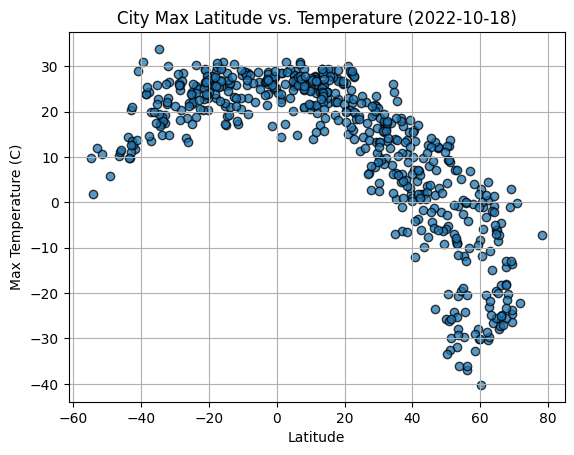

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

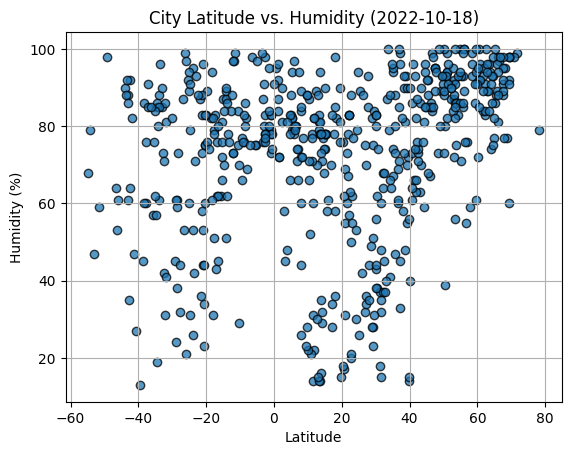

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="Black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

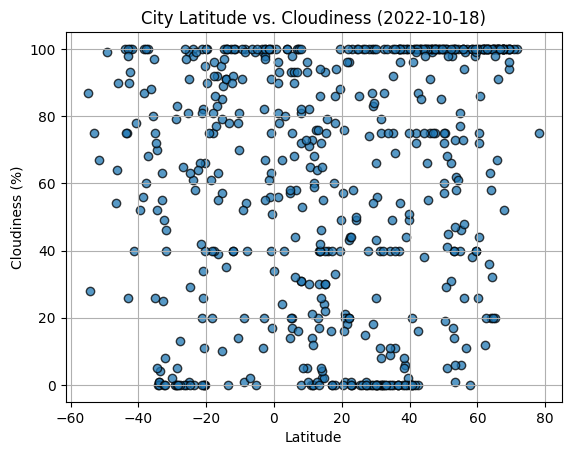

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="Black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

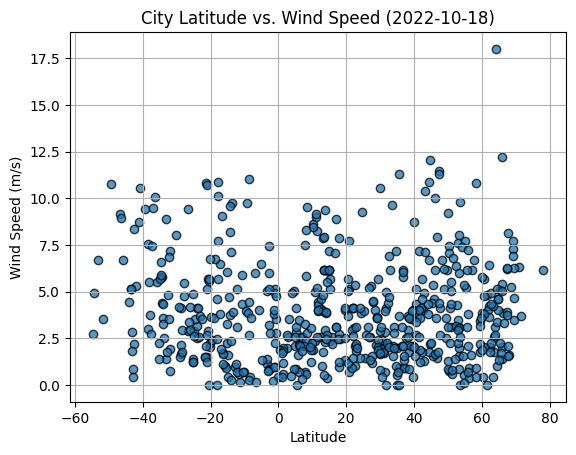

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="Black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def correlation(x_axis, y_axis, ylabel, xlabel="Latitude", coord=(5.8,0.8)):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regress_values = x_axis * slope + intercept

    plt.scatter(x_axis, y_axis, edgecolors="Black", alpha=0.75)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,coord,fontsize=15,color="red")
 
    plt.title(f"City {xlabel} vs. {ylabel} (2022-10-18)")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()

    print(f"The rvalue is: {rvalue}")
    plt.show()

#correlation(city_data_df["Lat"], city_data_df["Humidity"],"Humidity", coord=(40,20))

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,klaksvik,62.2266,-6.5890,4.51,83,100,6.42,FO,1702336190
4,boa vista,2.8197,-60.6733,30.99,58,40,2.57,BR,1702336191
6,tinajo,29.0788,-13.7081,21.49,28,83,3.60,ES,1702336191
7,ngama,11.7833,17.1667,19.78,22,68,4.46,TD,1702336192
8,rushville,39.6092,-85.4464,1.93,72,2,0.45,US,1702336192


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,10.69,59,67,3.56,CL,1702336191
2,adamstown,-25.0660,-130.1015,21.70,60,1,1.41,PN,1702336191
3,port-aux-francais,-49.3500,70.2167,5.73,98,99,10.77,TF,1702336191
5,lamarque,-39.4230,-65.7021,30.96,13,52,9.44,AR,1702336191
12,grytviken,-54.2811,-36.5092,1.79,79,28,4.91,GS,1702336192


###  Temperature vs. Latitude Linear Regression Plot

The rvalue is: -0.8454794668268633


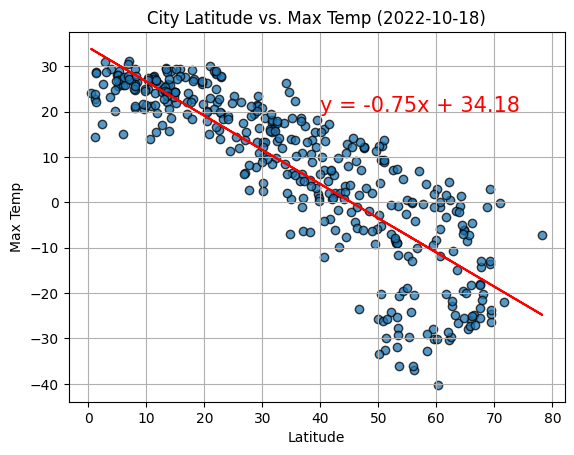

In [26]:
# Linear regression on Northern Hemisphere
correlation(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],"Max Temp", coord=(40,20))

The rvalue is: 0.6166775870445358


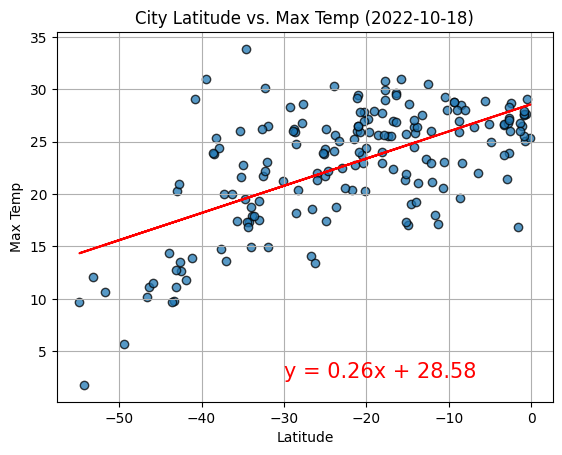

In [28]:
# Linear regression on Southern Hemisphere
correlation(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],"Max Temp", coord=(-30,2.5))

**Discussion about the linear relationship:** 
For the northern hemisphere, there is a strong negative coorelation between the city latitude and max temp. It equates to -0.85. For the southern hemisphere, there is a positive coorelation. This equates to 0.62. This is expected to happen because it is common for the temperature to decrease the further away the equater is. 

### Humidity vs. Latitude Linear Regression Plot

The rvalue is: 0.409060216754339


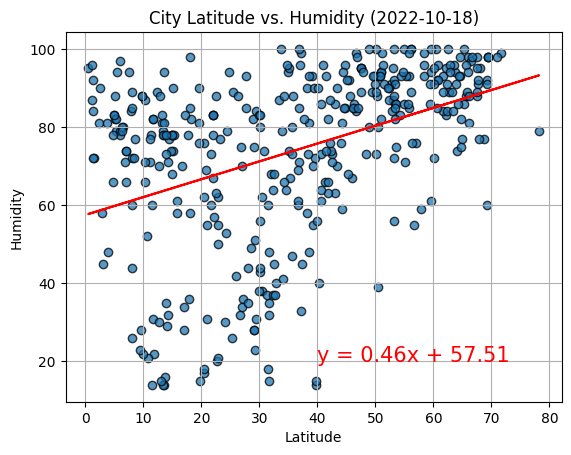

In [29]:
# Northern Hemisphere
correlation(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],"Humidity", coord=(40,20))

The rvalue is: 0.2397211690861295


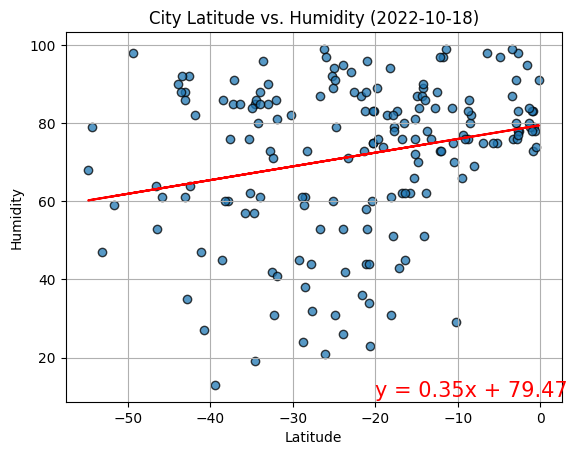

In [32]:
# Southern Hemisphere
correlation(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],"Humidity", coord=(-20,10))

**Discussion about the linear relationship:** 
The northern hemisphere had a positive coorelation of 0.41 between latitude and humidity. The southern hemisphere also had a slightly positive coorelation of 0.24 between the two. This means that humidity slightly increases the more north the city is.  

### Cloudiness vs. Latitude Linear Regression Plot

The rvalue is: 0.3039906158533273


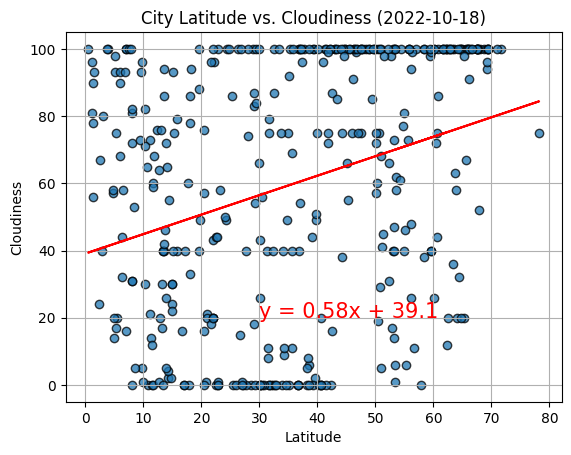

In [45]:
# Northern Hemisphere
correlation(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],"Cloudiness", coord=(30,20))

The rvalue is: 0.0866578549318222


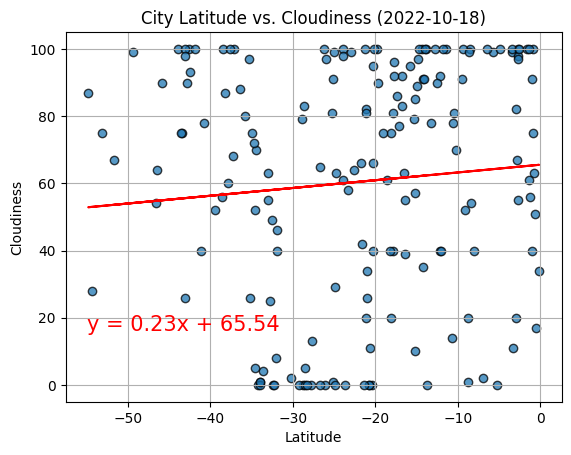

In [39]:
# Southern Hemisphere
correlation(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],"Cloudiness", coord=(-55,16))

**Discussion about the linear relationship:** 
The northern hemisphere had a positive coorelation of 0.30 when comparing latitude and cloudiness. As far as the southern hemisphere, the coorelation was also positive but only slightly, calculating to only 0.09. This means that cloudiness should slightly increase the more north a city is. 

### Wind Speed vs. Latitude Linear Regression Plot

The rvalue is: 0.11994971126026946


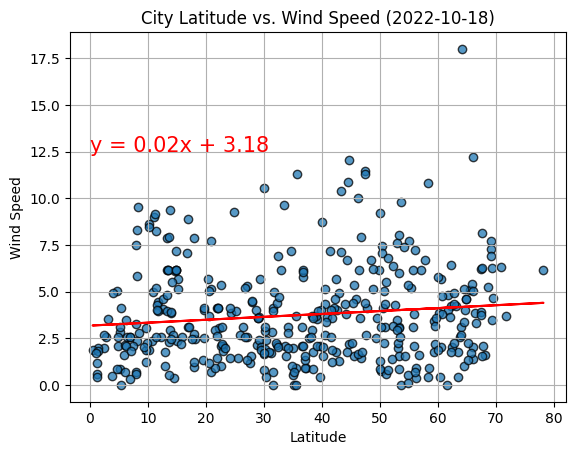

In [41]:
# Northern Hemisphere
correlation(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],"Wind Speed", coord=(0,12.5))

The rvalue is: -0.2504304548370382


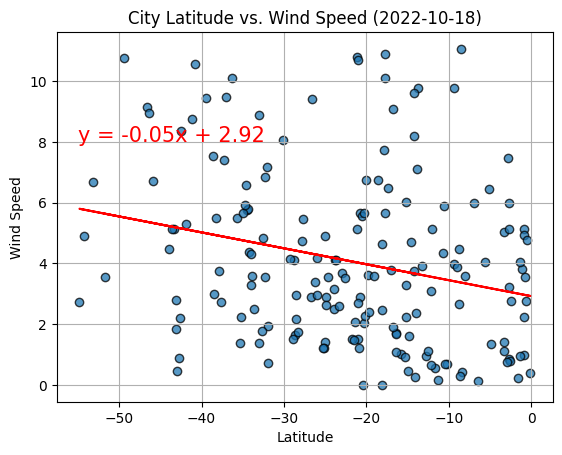

In [43]:
# Southern Hemisphere
correlation(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],"Wind Speed", coord=(-55, 8))

**Discussion about the linear relationship:** 
The northern hemisphere's coorelation between latitude and wind speed is slightly positive, calculating to only 0.12. The southern hemisphere on the other hand had a slightly stronger coorelation but negative between the two, calculating to -0.25. This means that the further away from the equator a city is the greater the wind speeds. 